# Import librairies

In [1681]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler

from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score

import tensorflow as tf

# Load Data

In [1682]:
df_train = pd.read_csv('train.csv')
df_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [1683]:
df_test = pd.read_csv('test.csv')
df_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [1684]:
Ids2 = df_test['PassengerId']
Ids2 = pd.DataFrame(data=Ids2, columns=['PassengerId'])

# Cleaning

In [1685]:
df_train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [1686]:
df_test.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [1687]:
df_train['train'] = 1
df_test['train'] = 0

In [1688]:
df = pd.concat([df_train.drop('Transported', axis = 1), df_test])
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,train
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,1
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,1
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,0
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,0
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,0
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,0


In [1689]:
df[["Cabin1_", 'Cabin2_', 'Cabin3_']] = df["Cabin"].str.split('/', expand=True)
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,train,Cabin1_,Cabin2_,Cabin3_
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,1,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,1,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,1,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,0,G,1496,S
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,0,NaN,NaN,NaN
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,0,D,296,P
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,0,D,297,P


In [1690]:
df[["PassengerId_1", 'PassengerId_2']] = df["PassengerId"].str.split('_', expand=True).astype('int')
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,train,Cabin1_,Cabin2_,Cabin3_,PassengerId_1,PassengerId_2
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,1,B,0,P,1,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,F,0,S,2,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,1,A,0,S,3,1
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,1,A,0,S,3,2
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,F,1,S,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,0,G,1496,S,9266,2
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,0,NaN,NaN,NaN,9269,1
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,0,D,296,P,9271,1
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,0,D,297,P,9273,1


In [1691]:
df[["First_name", 'Last_name']] = df["Name"].str.split(' ', expand=True)
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,VRDeck,Name,train,Cabin1_,Cabin2_,Cabin3_,PassengerId_1,PassengerId_2,First_name,Last_name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,0.0,Maham Ofracculy,1,B,0,P,1,1,Maham,Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,44.0,Juanna Vines,1,F,0,S,2,1,Juanna,Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,49.0,Altark Susent,1,A,0,S,3,1,Altark,Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,193.0,Solam Susent,1,A,0,S,3,2,Solam,Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,2.0,Willy Santantines,1,F,1,S,4,1,Willy,Santantines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,...,0.0,Jeron Peter,0,G,1496,S,9266,2,Jeron,Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,...,144.0,Matty Scheron,0,NaN,NaN,NaN,9269,1,Matty,Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,...,0.0,Jayrin Pore,0,D,296,P,9271,1,Jayrin,Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,...,523.0,Kitakan Conale,0,D,297,P,9273,1,Kitakan,Conale


In [1692]:
df['Sum_extra'] = df['RoomService'] + df['FoodCourt'] + df['ShoppingMall'] + df['Spa'] + df['VRDeck']
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Name,train,Cabin1_,Cabin2_,Cabin3_,PassengerId_1,PassengerId_2,First_name,Last_name,Sum_extra
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,Maham Ofracculy,1,B,0,P,1,1,Maham,Ofracculy,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,Juanna Vines,1,F,0,S,2,1,Juanna,Vines,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,Altark Susent,1,A,0,S,3,1,Altark,Susent,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,Solam Susent,1,A,0,S,3,2,Solam,Susent,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,Willy Santantines,1,F,1,S,4,1,Willy,Santantines,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,...,Jeron Peter,0,G,1496,S,9266,2,Jeron,Peter,0.0
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,...,Matty Scheron,0,NaN,NaN,NaN,9269,1,Matty,Scheron,1018.0
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,...,Jayrin Pore,0,D,296,P,9271,1,Jayrin,Pore,0.0
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,...,Kitakan Conale,0,D,297,P,9273,1,Kitakan,Conale,3203.0


In [1693]:
df['Mean_extra'] = df['Sum_extra']/df['PassengerId_2']
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,train,Cabin1_,Cabin2_,Cabin3_,PassengerId_1,PassengerId_2,First_name,Last_name,Sum_extra,Mean_extra
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,1,B,0,P,1,1,Maham,Ofracculy,0.0,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,1,F,0,S,2,1,Juanna,Vines,736.0,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,1,A,0,S,3,1,Altark,Susent,10383.0,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,1,A,0,S,3,2,Solam,Susent,5176.0,2588.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,1,F,1,S,4,1,Willy,Santantines,1091.0,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,...,0,G,1496,S,9266,2,Jeron,Peter,0.0,0.0
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,...,0,NaN,NaN,NaN,9269,1,Matty,Scheron,1018.0,1018.0
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,...,0,D,296,P,9271,1,Jayrin,Pore,0.0,0.0
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,...,0,D,297,P,9273,1,Kitakan,Conale,3203.0,3203.0


In [1694]:
df['Age_category'] = pd.cut(df.Age,bins=[0, 5, 12, 18, 50, 150], labels=['Baby','Child','Teen', 'Adult','Elderly'])
df['Age_category']

0         Adult
1         Adult
2       Elderly
3         Adult
4          Teen
         ...   
4272      Adult
4273      Adult
4274        NaN
4275        NaN
4276      Adult
Name: Age_category, Length: 12970, dtype: category
Categories (5, object): ['Baby' < 'Child' < 'Teen' < 'Adult' < 'Elderly']

In [1695]:
Ids = df['PassengerId']

In [1696]:
df = df.set_index('PassengerId')
df

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,...,Cabin1_,Cabin2_,Cabin3_,PassengerId_1,PassengerId_2,First_name,Last_name,Sum_extra,Mean_extra,Age_category
PassengerId,,,,,,,,,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,...,B,0,P,1,1,Maham,Ofracculy,0.0,0.0,Adult
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,...,F,0,S,2,1,Juanna,Vines,736.0,736.0,Adult
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,...,A,0,S,3,1,Altark,Susent,10383.0,10383.0,Elderly
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,...,A,0,S,3,2,Solam,Susent,5176.0,2588.0,Adult
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,...,F,1,S,4,1,Willy,Santantines,1091.0,1091.0,Teen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,...,G,1496,S,9266,2,Jeron,Peter,0.0,0.0,Adult
9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,...,NaN,NaN,NaN,9269,1,Matty,Scheron,1018.0,1018.0,Adult
9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,...,D,296,P,9271,1,Jayrin,Pore,0.0,0.0,NaN


In [1697]:
df = df.drop(['Cabin', 'Name'], axis = 1)
df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,Cabin1_,Cabin2_,Cabin3_,PassengerId_1,PassengerId_2,First_name,Last_name,Sum_extra,Mean_extra,Age_category
PassengerId,,,,,,,,,,,,,,,,,,,,,
0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,...,B,0,P,1,1,Maham,Ofracculy,0.0,0.0,Adult
0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,...,F,0,S,2,1,Juanna,Vines,736.0,736.0,Adult
0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,...,A,0,S,3,1,Altark,Susent,10383.0,10383.0,Elderly
0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,...,A,0,S,3,2,Solam,Susent,5176.0,2588.0,Adult
0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,...,F,1,S,4,1,Willy,Santantines,1091.0,1091.0,Teen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9266_02,Earth,True,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,...,G,1496,S,9266,2,Jeron,Peter,0.0,0.0,Adult
9269_01,Earth,False,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,...,NaN,NaN,NaN,9269,1,Matty,Scheron,1018.0,1018.0,Adult
9271_01,Mars,True,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,...,D,296,P,9271,1,Jayrin,Pore,0.0,0.0,NaN


In [1698]:
numerical = df.select_dtypes(exclude = ['object', 'category']).columns.to_list()
numerical

['Age',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'train',
 'PassengerId_1',
 'PassengerId_2',
 'Sum_extra',
 'Mean_extra']

In [1699]:
categorical = df.select_dtypes(['object', 'category']).columns.to_list()
categorical

['HomePlanet',
 'CryoSleep',
 'Destination',
 'VIP',
 'Cabin1_',
 'Cabin2_',
 'Cabin3_',
 'First_name',
 'Last_name',
 'Age_category']

# Visualisation

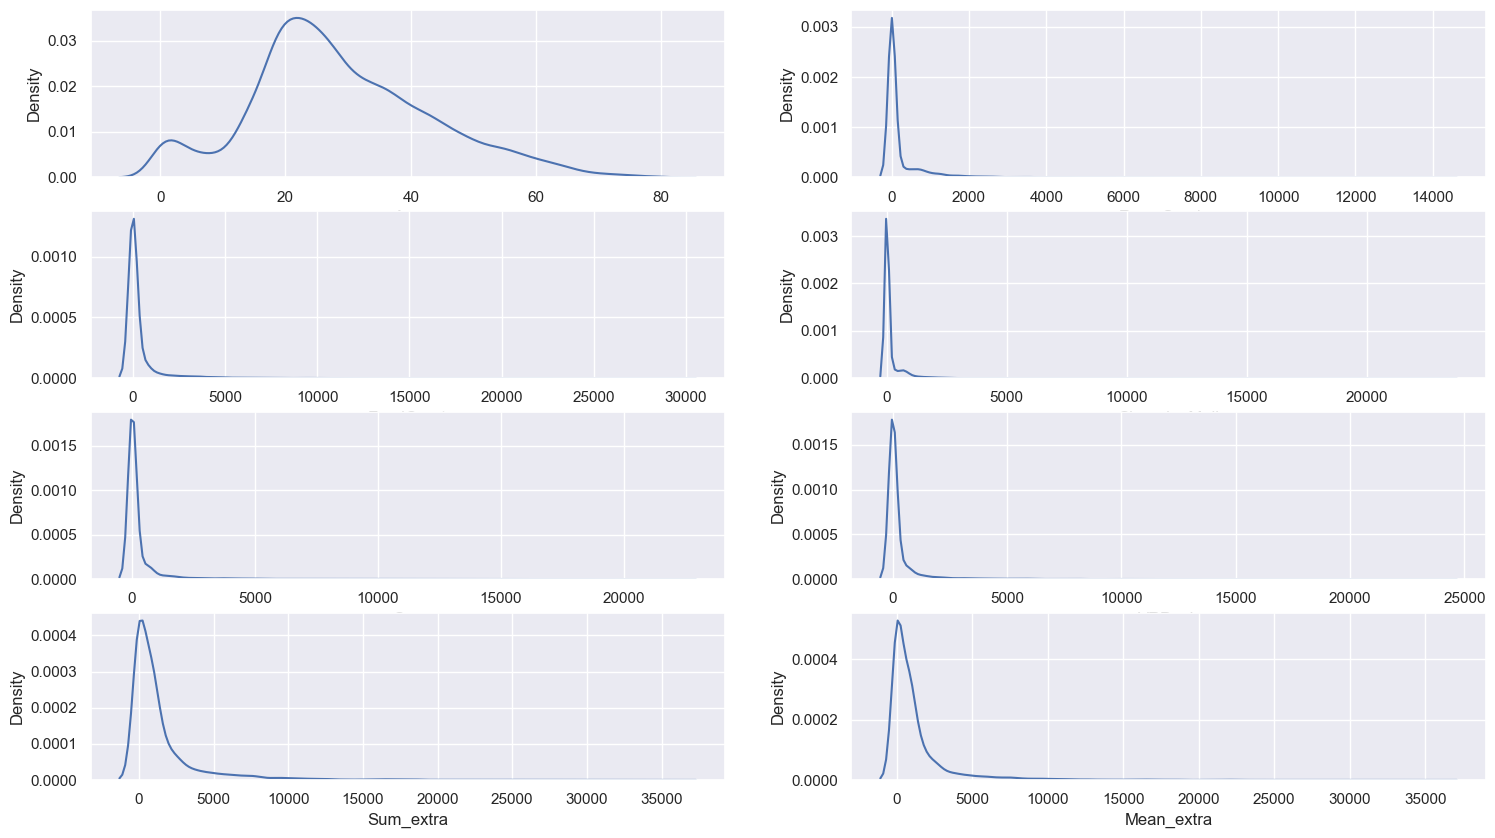

In [1700]:
columns=['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Sum_extra', 'Mean_extra']
q, r = divmod(len(columns), 2)
fig, ax=plt.subplots(q, 2, figsize=(18,10))
for i in range(0,len(columns)):
    q, r =divmod(i, 2)
    sns.kdeplot(data=df[numerical], x=columns[i], ax=ax[q, r])

plt.show()

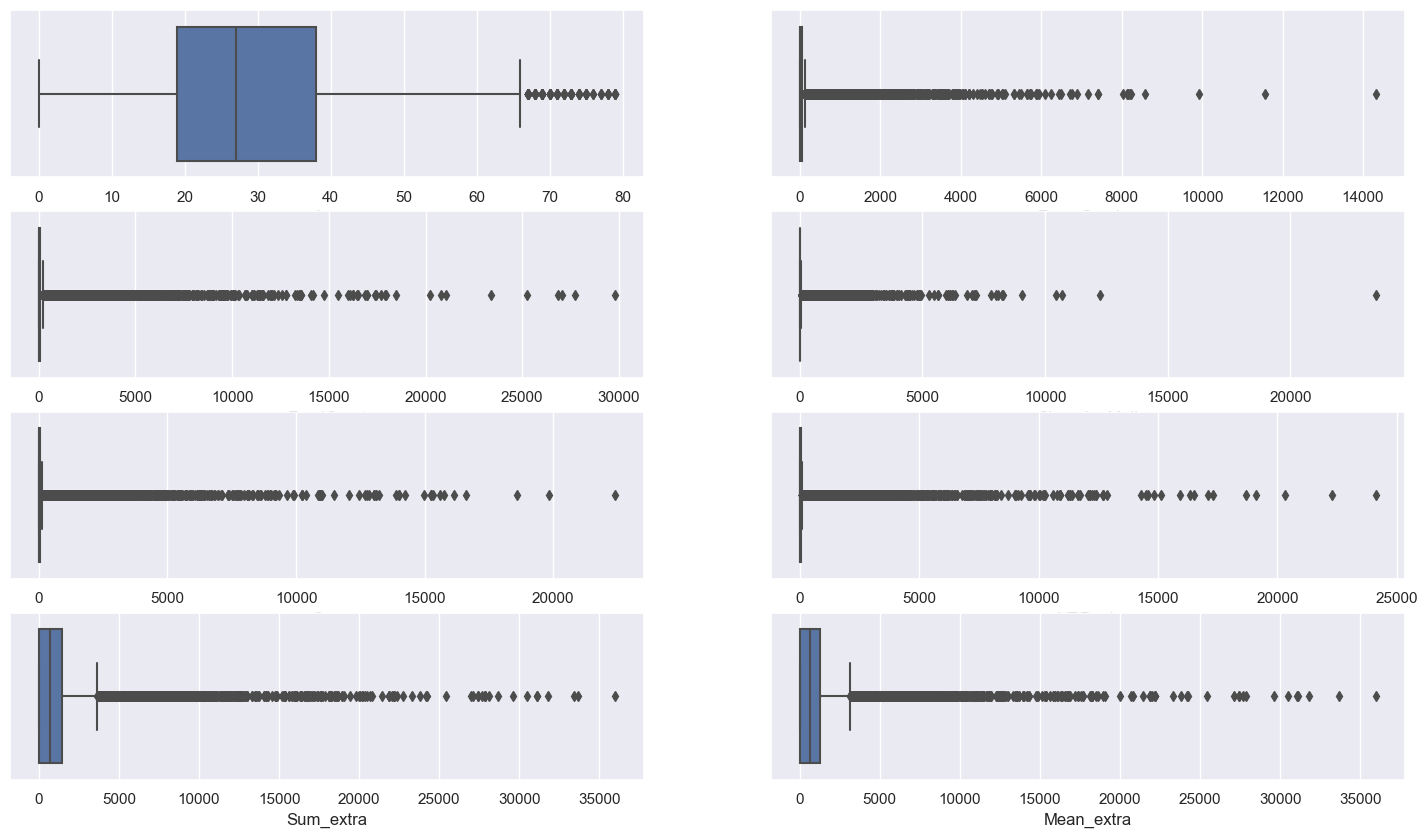

In [1701]:
q, r =divmod(len(columns), 2)
fig, ax=plt.subplots(q, 2, figsize=(18,10))
for i in range(0,len(columns)):
    q, r =divmod(i, 2)
    sns.boxplot(data=df[numerical], x=columns[i], ax=ax[q, r])
plt.show()

# Missing Data (numerical)

In [1702]:
imputer = KNNImputer(n_neighbors=10)
imputer.fit(df[numerical])

KNNImputer(n_neighbors=10)

In [1703]:
df_numerical = imputer.transform(df[numerical])
df_numerical

array([[3.9000e+01, 0.0000e+00, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.4000e+01, 1.0900e+02, 9.0000e+00, ..., 1.0000e+00, 7.3600e+02,
        7.3600e+02],
       [5.8000e+01, 4.3000e+01, 3.5760e+03, ..., 1.0000e+00, 1.0383e+04,
        1.0383e+04],
       ...,
       [2.5300e+01, 0.0000e+00, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.5800e+01, 0.0000e+00, 2.6800e+03, ..., 1.0000e+00, 3.2030e+03,
        3.2030e+03],
       [4.3000e+01, 0.0000e+00, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [1704]:
df_numerical = pd.DataFrame(df_numerical, columns= ['Age',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'train',
 'PassengerId_1',
 'PassengerId_2',
 'Sum_extra',
 'Mean_extra'] )
df_numerical

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,train,PassengerId_1,PassengerId_2,Sum_extra,Mean_extra
0,39.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0,1.0,2.0,1.0,736.0,736.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,1.0,3.0,1.0,10383.0,10383.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,1.0,3.0,2.0,5176.0,2588.0
4,16.0,303.0,70.0,151.0,565.0,2.0,1.0,4.0,1.0,1091.0,1091.0
...,...,...,...,...,...,...,...,...,...,...,...
12965,34.0,0.0,0.0,0.0,0.0,0.0,0.0,9266.0,2.0,0.0,0.0
12966,42.0,0.0,847.0,17.0,10.0,144.0,0.0,9269.0,1.0,1018.0,1018.0
12967,25.3,0.0,0.0,0.0,0.0,0.0,0.0,9271.0,1.0,0.0,0.0
12968,25.8,0.0,2680.0,0.0,0.0,523.0,0.0,9273.0,1.0,3203.0,3203.0


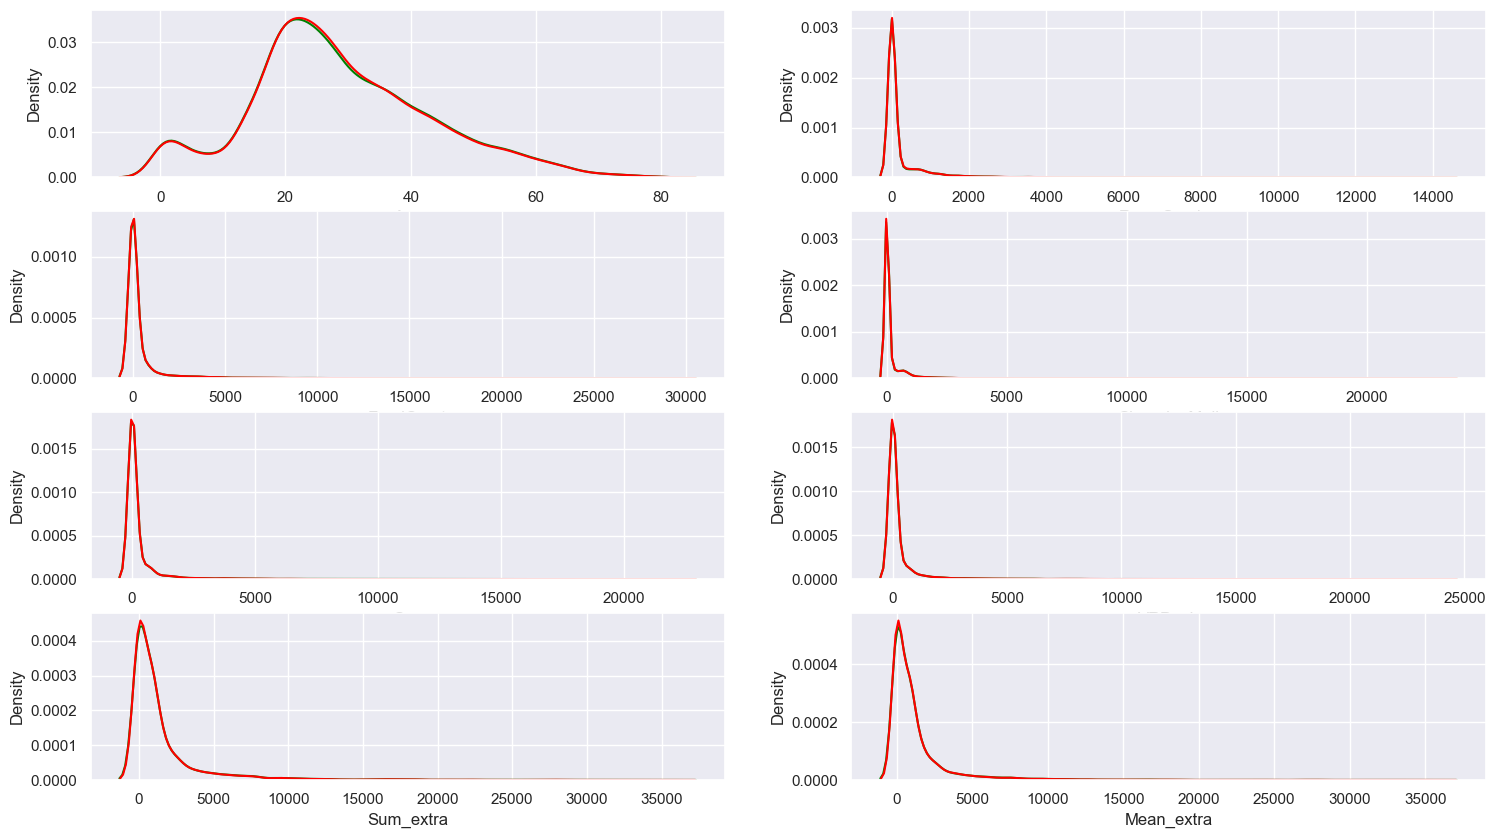

In [1705]:
q, r =divmod(len(columns), 2)
fig, ax=plt.subplots(q, 2, figsize=(18,10))
for i in range(0,len(columns)):
    q, r =divmod(i, 2)
    sns.kdeplot(data=df, x=columns[i], ax=ax[q, r], color ='green')
    sns.kdeplot(data=df_numerical, x=columns[i], ax=ax[q, r], color='red')
plt.show()

# Missing Data (Categorical)

In [1706]:
imputer2 = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
imputer2.fit(df[categorical])

SimpleImputer(strategy='most_frequent')

In [1707]:
df_categorical = imputer2.transform(df[categorical])
df_categorical

array([['Europa', False, 'TRAPPIST-1e', ..., 'Maham', 'Ofracculy',
        'Adult'],
       ['Earth', False, 'TRAPPIST-1e', ..., 'Juanna', 'Vines', 'Adult'],
       ['Europa', False, 'TRAPPIST-1e', ..., 'Altark', 'Susent',
        'Elderly'],
       ...,
       ['Mars', True, '55 Cancri e', ..., 'Jayrin', 'Pore', 'Adult'],
       ['Europa', False, 'TRAPPIST-1e', ..., 'Kitakan', 'Conale',
        'Adult'],
       ['Earth', True, 'PSO J318.5-22', ..., 'Lilace', 'Leonzaley',
        'Adult']], dtype=object)

In [1708]:
df_categorical = pd.DataFrame(df_categorical, columns=['HomePlanet',
 'CryoSleep',
 'Destination',
 'VIP',
 'Cabin1_',
 'Cabin2_',
 'Cabin3_',
 'First_name',
 'Last_name',
 'Age_category'])

In [1709]:
df_categorical.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
VIP             0
Cabin1_         0
Cabin2_         0
Cabin3_         0
First_name      0
Last_name       0
Age_category    0
dtype: int64

In [1710]:
df_categorical

,HomePlanet,CryoSleep,Destination,VIP,Cabin1_,Cabin2_,Cabin3_,First_name,Last_name,Age_category
0,Europa,False,TRAPPIST-1e,False,B,0,P,Maham,Ofracculy,Adult
1,Earth,False,TRAPPIST-1e,False,F,0,S,Juanna,Vines,Adult
2,Europa,False,TRAPPIST-1e,True,A,0,S,Altark,Susent,Elderly
3,Europa,False,TRAPPIST-1e,False,A,0,S,Solam,Susent,Adult
4,Earth,False,TRAPPIST-1e,False,F,1,S,Willy,Santantines,Teen
...,...,...,...,...,...,...,...,...,...,...
12965,Earth,True,TRAPPIST-1e,False,G,1496,S,Jeron,Peter,Adult
12966,Earth,False,TRAPPIST-1e,False,F,82,S,Matty,Scheron,Adult
12967,Mars,True,55 Cancri e,False,D,296,P,Jayrin,Pore,Adult
12968,Europa,False,TRAPPIST-1e,False,D,297,P,Kitakan,Conale,Adult


In [1711]:
df_imputed = pd.concat([df_numerical,df_categorical], axis = 1)
df_imputed

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,train,PassengerId_1,PassengerId_2,Sum_extra,...,HomePlanet,CryoSleep,Destination,VIP,Cabin1_,Cabin2_,Cabin3_,First_name,Last_name,Age_category
0,39.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,Europa,False,TRAPPIST-1e,False,B,0,P,Maham,Ofracculy,Adult
1,24.0,109.0,9.0,25.0,549.0,44.0,1.0,2.0,1.0,736.0,...,Earth,False,TRAPPIST-1e,False,F,0,S,Juanna,Vines,Adult
2,58.0,43.0,3576.0,0.0,6715.0,49.0,1.0,3.0,1.0,10383.0,...,Europa,False,TRAPPIST-1e,True,A,0,S,Altark,Susent,Elderly
3,33.0,0.0,1283.0,371.0,3329.0,193.0,1.0,3.0,2.0,5176.0,...,Europa,False,TRAPPIST-1e,False,A,0,S,Solam,Susent,Adult
4,16.0,303.0,70.0,151.0,565.0,2.0,1.0,4.0,1.0,1091.0,...,Earth,False,TRAPPIST-1e,False,F,1,S,Willy,Santantines,Teen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,34.0,0.0,0.0,0.0,0.0,0.0,0.0,9266.0,2.0,0.0,...,Earth,True,TRAPPIST-1e,False,G,1496,S,Jeron,Peter,Adult
12966,42.0,0.0,847.0,17.0,10.0,144.0,0.0,9269.0,1.0,1018.0,...,Earth,False,TRAPPIST-1e,False,F,82,S,Matty,Scheron,Adult
12967,25.3,0.0,0.0,0.0,0.0,0.0,0.0,9271.0,1.0,0.0,...,Mars,True,55 Cancri e,False,D,296,P,Jayrin,Pore,Adult
12968,25.8,0.0,2680.0,0.0,0.0,523.0,0.0,9273.0,1.0,3203.0,...,Europa,False,TRAPPIST-1e,False,D,297,P,Kitakan,Conale,Adult


# Pre Processing

In [1712]:
df_imputed[["CryoSleep", 'VIP']] = df_imputed[["CryoSleep", 'VIP']].astype('bool').astype(int)
df_imputed

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,train,PassengerId_1,PassengerId_2,Sum_extra,...,HomePlanet,CryoSleep,Destination,VIP,Cabin1_,Cabin2_,Cabin3_,First_name,Last_name,Age_category
0,39.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,Europa,0,TRAPPIST-1e,0,B,0,P,Maham,Ofracculy,Adult
1,24.0,109.0,9.0,25.0,549.0,44.0,1.0,2.0,1.0,736.0,...,Earth,0,TRAPPIST-1e,0,F,0,S,Juanna,Vines,Adult
2,58.0,43.0,3576.0,0.0,6715.0,49.0,1.0,3.0,1.0,10383.0,...,Europa,0,TRAPPIST-1e,1,A,0,S,Altark,Susent,Elderly
3,33.0,0.0,1283.0,371.0,3329.0,193.0,1.0,3.0,2.0,5176.0,...,Europa,0,TRAPPIST-1e,0,A,0,S,Solam,Susent,Adult
4,16.0,303.0,70.0,151.0,565.0,2.0,1.0,4.0,1.0,1091.0,...,Earth,0,TRAPPIST-1e,0,F,1,S,Willy,Santantines,Teen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,34.0,0.0,0.0,0.0,0.0,0.0,0.0,9266.0,2.0,0.0,...,Earth,1,TRAPPIST-1e,0,G,1496,S,Jeron,Peter,Adult
12966,42.0,0.0,847.0,17.0,10.0,144.0,0.0,9269.0,1.0,1018.0,...,Earth,0,TRAPPIST-1e,0,F,82,S,Matty,Scheron,Adult
12967,25.3,0.0,0.0,0.0,0.0,0.0,0.0,9271.0,1.0,0.0,...,Mars,1,55 Cancri e,0,D,296,P,Jayrin,Pore,Adult
12968,25.8,0.0,2680.0,0.0,0.0,523.0,0.0,9273.0,1.0,3203.0,...,Europa,0,TRAPPIST-1e,0,D,297,P,Kitakan,Conale,Adult


In [1713]:
df_final = df_imputed.drop(['First_name', 'Last_name', 'Cabin2_'], axis = 1)

In [1714]:
df_final = pd.get_dummies(df_final, columns=['Destination', 'HomePlanet', 'Cabin1_', 'Cabin3_', 'Age_category'])


In [1715]:
Ids = pd.DataFrame(data=Ids)
Ids

,PassengerId
0,0001_01
1,0002_01
2,0003_01
3,0003_02
4,0004_01
...,...
4272,9266_02
4273,9269_01
4274,9271_01
4275,9273_01


In [1716]:
df_final

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,train,PassengerId_1,PassengerId_2,Sum_extra,...,Cabin1__F,Cabin1__G,Cabin1__T,Cabin3__P,Cabin3__S,Age_category_Adult,Age_category_Baby,Age_category_Child,Age_category_Elderly,Age_category_Teen
0,39.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0,0,0,1,0,1,0,0,0,0
1,24.0,109.0,9.0,25.0,549.0,44.0,1.0,2.0,1.0,736.0,...,1,0,0,0,1,1,0,0,0,0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,1.0,3.0,1.0,10383.0,...,0,0,0,0,1,0,0,0,1,0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,1.0,3.0,2.0,5176.0,...,0,0,0,0,1,1,0,0,0,0
4,16.0,303.0,70.0,151.0,565.0,2.0,1.0,4.0,1.0,1091.0,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,34.0,0.0,0.0,0.0,0.0,0.0,0.0,9266.0,2.0,0.0,...,0,1,0,0,1,1,0,0,0,0
12966,42.0,0.0,847.0,17.0,10.0,144.0,0.0,9269.0,1.0,1018.0,...,1,0,0,0,1,1,0,0,0,0
12967,25.3,0.0,0.0,0.0,0.0,0.0,0.0,9271.0,1.0,0.0,...,0,0,0,1,0,1,0,0,0,0
12968,25.8,0.0,2680.0,0.0,0.0,523.0,0.0,9273.0,1.0,3203.0,...,0,0,0,1,0,1,0,0,0,0


In [1717]:
Ids = Ids.reset_index()
df_final = pd.concat([Ids, df_final], axis = 1)
df_final = df_final.drop(['index'], axis = 1)


In [1718]:
df_final = df_final.set_index('PassengerId')

In [1719]:
df_final

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,train,PassengerId_1,PassengerId_2,Sum_extra,...,Cabin1__F,Cabin1__G,Cabin1__T,Cabin3__P,Cabin3__S,Age_category_Adult,Age_category_Baby,Age_category_Child,Age_category_Elderly,Age_category_Teen
PassengerId,,,,,,,,,,,,,,,,,,,,,
0001_01,39.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0,0,0,1,0,1,0,0,0,0
0002_01,24.0,109.0,9.0,25.0,549.0,44.0,1.0,2.0,1.0,736.0,...,1,0,0,0,1,1,0,0,0,0
0003_01,58.0,43.0,3576.0,0.0,6715.0,49.0,1.0,3.0,1.0,10383.0,...,0,0,0,0,1,0,0,0,1,0
0003_02,33.0,0.0,1283.0,371.0,3329.0,193.0,1.0,3.0,2.0,5176.0,...,0,0,0,0,1,1,0,0,0,0
0004_01,16.0,303.0,70.0,151.0,565.0,2.0,1.0,4.0,1.0,1091.0,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9266_02,34.0,0.0,0.0,0.0,0.0,0.0,0.0,9266.0,2.0,0.0,...,0,1,0,0,1,1,0,0,0,0
9269_01,42.0,0.0,847.0,17.0,10.0,144.0,0.0,9269.0,1.0,1018.0,...,1,0,0,0,1,1,0,0,0,0
9271_01,25.3,0.0,0.0,0.0,0.0,0.0,0.0,9271.0,1.0,0.0,...,0,0,0,1,0,1,0,0,0,0


In [1720]:
X = df_final[df_final['train'] == 1]
X = X.drop('train', axis = 1)
X

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerId_1,PassengerId_2,Sum_extra,Mean_extra,...,Cabin1__F,Cabin1__G,Cabin1__T,Cabin3__P,Cabin3__S,Age_category_Adult,Age_category_Baby,Age_category_Child,Age_category_Elderly,Age_category_Teen
PassengerId,,,,,,,,,,,,,,,,,,,,,
0001_01,39.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0,0,0,1,0,1,0,0,0,0
0002_01,24.0,109.0,9.0,25.0,549.0,44.0,2.0,1.0,736.0,736.0,...,1,0,0,0,1,1,0,0,0,0
0003_01,58.0,43.0,3576.0,0.0,6715.0,49.0,3.0,1.0,10383.0,10383.0,...,0,0,0,0,1,0,0,0,1,0
0003_02,33.0,0.0,1283.0,371.0,3329.0,193.0,3.0,2.0,5176.0,2588.0,...,0,0,0,0,1,1,0,0,0,0
0004_01,16.0,303.0,70.0,151.0,565.0,2.0,4.0,1.0,1091.0,1091.0,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9276_01,41.0,0.0,6819.0,0.0,1643.0,74.0,9276.0,1.0,8536.0,8536.0,...,0,0,0,1,0,1,0,0,0,0
9278_01,18.0,0.0,0.0,0.0,0.0,0.0,9278.0,1.0,0.0,0.0,...,0,1,0,0,1,0,0,0,0,1
9279_01,26.0,0.0,0.0,1872.0,1.0,0.0,9279.0,1.0,1873.0,1873.0,...,0,1,0,0,1,1,0,0,0,0


In [1721]:
y = df_train.set_index('PassengerId')['Transported'].astype('bool').astype(int)
y

PassengerId
0001_01    0
0002_01    1
0003_01    0
0003_02    0
0004_01    1
          ..
9276_01    0
9278_01    0
9279_01    1
9280_01    0
9280_02    1
Name: Transported, Length: 8693, dtype: int64

In [1722]:
test = df_final[df_final['train'] == 0]
test = test.drop('train', axis = 1)
test

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerId_1,PassengerId_2,Sum_extra,Mean_extra,...,Cabin1__F,Cabin1__G,Cabin1__T,Cabin3__P,Cabin3__S,Age_category_Adult,Age_category_Baby,Age_category_Child,Age_category_Elderly,Age_category_Teen
PassengerId,,,,,,,,,,,,,,,,,,,,,
0013_01,27.0,0.0,0.0,0.0,0.0,0.0,13.0,1.0,0.0,0.0,...,0,1,0,0,1,1,0,0,0,0
0018_01,19.0,0.0,9.0,0.0,2823.0,0.0,18.0,1.0,2832.0,2832.0,...,1,0,0,0,1,1,0,0,0,0
0019_01,31.0,0.0,0.0,0.0,0.0,0.0,19.0,1.0,0.0,0.0,...,0,0,0,0,1,1,0,0,0,0
0021_01,38.0,0.0,6652.0,0.0,181.0,585.0,21.0,1.0,7418.0,7418.0,...,0,0,0,0,1,1,0,0,0,0
0023_01,20.0,10.0,0.0,635.0,0.0,0.0,23.0,1.0,645.0,645.0,...,1,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9266_02,34.0,0.0,0.0,0.0,0.0,0.0,9266.0,2.0,0.0,0.0,...,0,1,0,0,1,1,0,0,0,0
9269_01,42.0,0.0,847.0,17.0,10.0,144.0,9269.0,1.0,1018.0,1018.0,...,1,0,0,0,1,1,0,0,0,0
9271_01,25.3,0.0,0.0,0.0,0.0,0.0,9271.0,1.0,0.0,0.0,...,0,0,0,1,0,1,0,0,0,0


In [1723]:
sc = StandardScaler()
X = sc.fit_transform(X)

# Training process

## Regressor

In [1724]:
logreg = LogisticRegression()
logreg.fit(X, y)
y_pred_log = logreg.predict(test)

/Users/achilleraffin-marchetti/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [1725]:
adaboost = AdaBoostClassifier()
adaboost.fit(X, y)
y_pred_boost = adaboost.predict(test)

/Users/achilleraffin-marchetti/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


In [1726]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X, y)
y_pred_forest = random_forest.predict(test)

/Users/achilleraffin-marchetti/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [1727]:
xg = XGBClassifier()
xg.fit(X, y)
y_pred_xg = xg.predict(test)

In [1728]:
y_pred_log = (y_pred_log > 0.5)

In [1729]:
y_pred_boost = (y_pred_boost > 0.5)

In [1730]:
y_pred_forest = (y_pred_forest > 0.5)

In [1731]:
y_pred_xg = (y_pred_xg > 0.5)

In [1732]:
y_pred_log = pd.DataFrame(y_pred_log, columns=['Transported_log'])

In [1733]:
y_pred_boost = pd.DataFrame(y_pred_boost, columns=['Transported_boost'])

In [1734]:
y_pred_forest = pd.DataFrame(y_pred_forest, columns=['Transported_forest'])

In [1735]:
y_pred_xg = pd.DataFrame(y_pred_xg, columns=['Transported_xg'])

In [1736]:
result_log = pd.concat([Ids2, y_pred_log], axis = 1)

In [1737]:
result_boost = pd.concat([Ids2, y_pred_boost], axis = 1)

In [1738]:
result_forest = pd.concat([Ids2, y_pred_forest], axis = 1)

In [1739]:
result_xg = pd.concat([Ids2, y_pred_xg], axis = 1)

# Compare ML Models

In [1740]:
concat = pd.concat([y_pred_log, y_pred_boost, y_pred_forest, y_pred_xg], axis =1)
concat

,Transported_log,Transported_boost,Transported_forest,Transported_xg
0,False,False,False,False
1,False,False,False,False
2,False,True,True,False
3,True,False,False,False
4,True,True,False,False
...,...,...,...,...
4272,True,False,False,False
4273,True,False,False,False
4274,True,False,False,False
4275,True,False,False,False


In [1741]:
corr = concat.corr()

<AxesSubplot:>

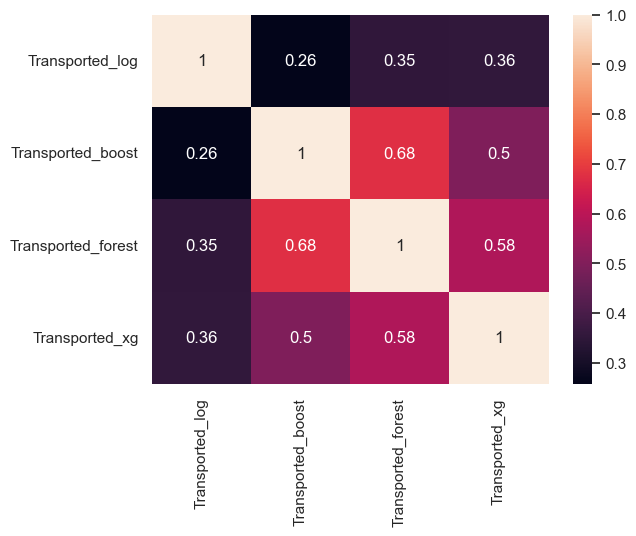

In [1742]:
sns.heatmap(corr, annot=True)

## Export results

In [1743]:
result_log.to_csv('Log_out.zip', sep = ',', index=False)

In [1744]:
result_boost.to_csv('Boost_out.zip', sep = ',', index=False)

In [1745]:
result_forest.to_csv('Forest_out.zip', sep = ',', index=False)

In [1746]:
result_xg.to_csv('XG_out.zip', sep = ',', index=False)